In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score, plot_roc_curve, \
                            plot_precision_recall_curve, precision_recall_curve, \
                            f1_score
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [18]:
df = pd.read_csv('data/students.csv', sep=',')

df.head()

y = df[' UNS']
x = df.drop(columns=[' UNS'], axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=66)

In [19]:
# categorical = []
numerical = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


f1_score:  0.8842105263157896
CPU times: user 138 ms, sys: 7.76 ms, total: 146 ms
Wall time: 166 ms


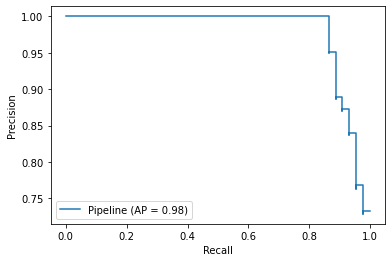

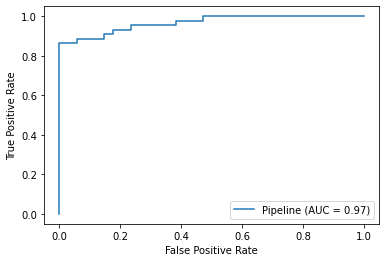

In [20]:
%%time

transformer_ohe = ColumnTransformer(transformers=[('num', StandardScaler(), numerical)])
pipeline_ohe = Pipeline(steps=[('transformer', transformer_ohe),
                              ('class', LogisticRegression(C=0.01,  
                                                           max_iter=100000, verbose=True))])
pipeline_ohe.fit(x_train, y_train)
prediction_ohe = pipeline_ohe.predict(x_test)

plot_precision_recall_curve (pipeline_ohe, x_test, y_test)
plot_roc_curve (pipeline_ohe, x_test, y_test)

y_test_array = y_test.array

print('f1_score: ', f1_score(y_test_array, prediction_ohe))